In [248]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from vega_datasets import data
import plotly.graph_objects as go
import plotly.io as pio

plt.style.use('seaborn-whitegrid')

In [2]:
dmajcity = pd.read_csv("AvgTempMajorCity.csv").drop('Unnamed: 0',axis=1)
dstate = pd.read_csv("AvgTempStates.csv").drop('Unnamed: 0',axis=1)
dcity = pd.read_csv('AvgTempcities.csv').drop('Unnamed: 0',axis=1)

In [3]:
dcity.head(2)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Year
0,1743-11-01,6.068000,1.73700,Århus,Denmark,57.05N,10.33E,Nov,1743
1,1743-12-01,7.695135,1.66872,Århus,Denmark,57.05N,10.33E,Dec,1743


#### Notes about the Data
* Number of records 
* Average temperature column Min Value and Max value 
* AverageTemperatureUncertainty
* Number of Countries, do : {len(data['Country'].unique())}
* Number of Cities in both city and major city datasets
* Year Range 



### Observations

In [4]:
observations = {}

In [5]:
y_countrymed = pd.DataFrame(dcity.groupby(['Country','Year'])['AverageTemperature'].median())
observations['y_countrymed'] = 'YearWise Country Median-Temperature'
y_countrymed

AverageTemperature
Country     Year                    
Afghanistan 1833           13.576000
            1834           13.462000
            1835           14.342919
            1836           14.342919
            1837           14.342919
...                              ...
Zimbabwe    2009           21.078000
            2010           21.943000
            2011           21.511000
            2012           21.488500
            2013           19.625000

[32881 rows x 1 columns]

In [6]:
m_countrymed = pd.DataFrame(dcity.groupby(['Country','Month'])['AverageTemperature'].median())
observations['m_countrymed'] = 'Monthly Country Median-Temperature'
m_countrymed

AverageTemperature
Country     Month                    
Afghanistan Apr               13.7970
            Aug               24.2690
            Dec                2.7920
            Feb                3.1310
            Jan                1.0580
...                               ...
Zimbabwe    Mar               21.2410
            May               17.4940
            Nov               22.7500
            Oct               22.6500
            Sept              20.5225

[1908 rows x 1 columns]

In [7]:
# Countries & Major Cities
majorlocs = {}
for country in dmajcity['Country'].unique():
    majorlocs[country] = list(dmajcity[dmajcity['Country']==country]['City'].unique())
    
majorlocs

{"Côte D'Ivoire": ['Abidjan'],
 'Ethiopia': ['Addis Abeba'],
 'India': ['Ahmadabad',
  'Bangalore',
  'Bombay',
  'Calcutta',
  'Delhi',
  'Hyderabad',
  'Jaipur',
  'Kanpur',
  'Lakhnau',
  'Madras',
  'Nagpur',
  'New Delhi',
  'Pune',
  'Surat'],
 'Syria': ['Aleppo'],
 'Egypt': ['Alexandria', 'Cairo', 'Gizeh'],
 'Turkey': ['Ankara', 'Istanbul', 'Izmir'],
 'Iraq': ['Baghdad'],
 'Thailand': ['Bangkok'],
 'Brazil': ['Belo Horizonte',
  'Brasília',
  'Fortaleza',
  'Rio De Janeiro',
  'São Paulo',
  'Salvador'],
 'Germany': ['Berlin'],
 'Colombia': ['Bogotá', 'Cali'],
 'South Africa': ['Cape Town', 'Durban'],
 'Morocco': ['Casablanca'],
 'China': ['Changchun',
  'Chengdu',
  'Chongqing',
  'Dalian',
  'Guangzhou',
  'Harbin',
  'Jinan',
  'Nanjing',
  'Peking',
  'Shanghai',
  'Shenyang',
  'Taiyuan',
  'Tangshan',
  'Tianjin',
  'Wuhan',
  'Xian'],
 'United States': ['Chicago', 'Los Angeles', 'New York'],
 'Senegal': ['Dakar'],
 'Tanzania': ['Dar Es Salaam'],
 'Bangladesh': ['Dhaka'],


### Seasons

In [8]:
# def season(month):
#     day = 1

#     if month in ('Jan', 'Feb', 'Mar'):
#         season = 'Winter'
#     elif month in ('Apr', 'May', 'Jun'):
#         season = 'Spring'
#     elif month in ('Jul', 'Aug', 'Sept'):
#         season = 'Summer'
#     else:
#         season = 'Autumn'

#     if (month == 'Mar') and (day > 19):
#         season = 'Spring'
#     elif (month == 'Jun') and (day > 20):
#         season = 'Summer'
#     elif (month == 'Sept') and (day > 21):
#         season = 'Autumn'
#     elif (month == 'Dec') and (day > 20):
#         season = 'Winter'

#     return season

In [9]:
# india = dcity[dcity['Country']=='India']

In [10]:
# india['dt'] = pd.to_datetime(india['dt'])

In [11]:
# india['Season'] = india['Month'].apply(season)
# india

### Pipelines for Plots & transformations

In [297]:
def median_agg(data, sequence='Month',loc='Country',countryname=None,returnlists=False):
      
    '''
    Median Aggregation of AverageTemperatures by Country
    '''
    if loc == 'Country':    
        df = pd.DataFrame(data.groupby([loc, sequence])[['AverageTemperature','AverageTemperatureUncertainty']].median())
        if countryname !=None:
            try:
                return df.loc[countryname, :]
            except:
                print('Invalid Country Name')
        else:
            return pd.DataFrame(data.groupby([loc, sequence])[['AverageTemperature','AverageTemperatureUncertainty']].median())
    elif loc == 'City':
        if countryname != None:
            df = pd.DataFrame(data.groupby(['Country',loc, sequence])[['AverageTemperature','AverageTemperatureUncertainty']].median())
            try:
                return df.loc[countryname, :]
            except:
                print('Invalid Country Name')

        else:
            return pd.DataFrame(data.groupby([loc, sequence])[['AverageTemperature','AverageTemperatureUncertainty']].median())
            
    else:
        return None
    


### Monthly Average Temperature

In [13]:
def order_monthidx(df):
    cats = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sept', 'Oct', 'Nov', 'Dec']
    df.index = pd.CategoricalIndex(df.index, categories=cats, ordered=True)
    df = df.sort_index()
    return df

In [14]:
# def plotting(data,cityname,attr,mode='Monthwise',type2=None):
#     plt.figure(figsize=(15,8))
#     x = data.index
#     y = data[attr].values
#     plots = sns.barplot(x=x,y=y,palette='Blues_r',label=cityname)

#     for bar in plots.patches:
#         '''Snippet lifted from geeksforgeeks'''
#         plots.annotate(format(bar.get_height(), '.2f'),
#                        (bar.get_x() + bar.get_width() / 2,
#                         bar.get_height()), ha='center', va='center',
#                        size=12, xytext=(0, 8),
#                        textcoords='offset points')
#     '''Snippet lifted from geeksforgeeks'''
#     plt.title('Monthly Average Temperatures Recorded in {}'.format(cityname),size=15)
#     plt.ylabel('Temperatures °C',size=12)
#     plt.xlabel('Months',size=12)
#     plt.legend(bbox_to_anchor=(1.13, 1.05))
#     plt.show()
    

In [18]:

test = ['crimson','darkorange','magenta','darkslateblue']
for x in range(3):
    print(test.pop(0))



crimson
darkorange
magenta


In [360]:
def plottimeseries(data,cityname, attr='AverageTemperature',loc='City',multiple=None):
    
    ## Prompt 
    if attr == 'AverageTemperature':
        prompt = 'Average Temperature'
    else:
        prompt = 'Average Temperature Uncertainty (Δ T)'
    
    if loc=='City':

        if 'Month' in data.reset_index().columns:
            plt.figure(figsize=(15,8))
            
            if multiple == None:
                data = data.xs(cityname, level=0, drop_level=True)
                data = order_monthidx(data)
                x = data.index
                y = data[attr].values
                plots = sns.barplot(x=x,y=y,palette='Blues_r',label=cityname)

                for bar in plots.patches:
                    '''Snippet lifted from geeksforgeeks'''
                    plots.annotate(format(bar.get_height(), '.2f'),
                                   (bar.get_x() + bar.get_width() / 2,
                                    bar.get_height()), ha='center', va='center',
                                   size=12, xytext=(0, 8),
                                   textcoords='offset points')
                '''Snippet lifted from geeksforgeeks'''
                plt.title('Monthly {} Recorded in {}'.format(prompt,cityname),size=15)
                plt.ylabel('Temperatures °C',size=12)
                plt.xlabel('Months',size=12)
                plt.legend(bbox_to_anchor=(1.13, 1.05))
            
            else:
                coords = []
                if len(multiple) <=3 and len(multiple) <=5:
                    for cityname in multiple:
                        df = data.xs(cityname, level=0, drop_level=True)
                        df = order_monthidx(df)
                        x = df.index
                        y = df[attr].values
                        coords.append((x,y))
                

                # setting plot attributes
                plotattrs = {}
                colors = ['crimson','magenta','darkorange','darkslateblue']
                for cityname in multiple[1:]:
                    plotattrs[cityname] = {'marker':'o', 'color':colors.pop(0)}
                
                count = 0
                for coord,cityname in zip(coords,multiple):
                    x,y = coord

                    if count < 1:
                        sns.barplot(x=x,y=y,palette='Blues_r',label=cityname)
                        count +=1
                    else:
                        pltattrs = plotattrs[cityname]
                        sns.lineplot(x=x,y=y,color=pltattrs['color'],marker=pltattrs['marker'],label=cityname)
                    plt.title('Monthly {} Recorded in {}'.format(prompt,cityname),size=15)
                    plt.ylabel('Temperatures °C',size=12)
                    plt.xlabel('Months',size=12)
                    plt.legend(bbox_to_anchor=(1.13, 1.05))
                
            
        else:
            data = data.xs(cityname, level=0, drop_level=True)
            plt.figure(figsize=(15,8))
            x = data.index
            y = data[attr].values
            sns.lineplot(x=x,y=y,label=cityname,marker='o',color='orange',palette='inferno')
            plt.title('Yearly {} Recorded in {}'.format(prompt,cityname),size=15)
            plt.ylabel('Temperatures °C',size=12)
            plt.xlabel('Years',size=12)
            plt.legend(bbox_to_anchor=(1.13, 1.05))

    else:
        pass


In [361]:
# example
monthex = median_agg(dcity,sequence='Month',loc='City',countryname='Canada')
pd.Series(dict(monthex.index)).index

Index(['Abbotsford', 'Barrie', 'Calgary', 'Edmonton', 'Guelph', 'Halifax',
       'Hamilton', 'Kelowna', 'Kingston', 'Kitchener', 'London', 'Montreal',
       'Oshawa', 'Ottawa', 'Quebec', 'Regina', 'Saskatoon', 'Sherbrooke',
       'Sudbury', 'Toronto', 'Trois Rivières', 'Vancouver', 'Victoria',
       'Waterloo', 'Winnipeg'],
      dtype='object')

In [362]:
cities = ['Ottawa','Sydney','Tokyo']

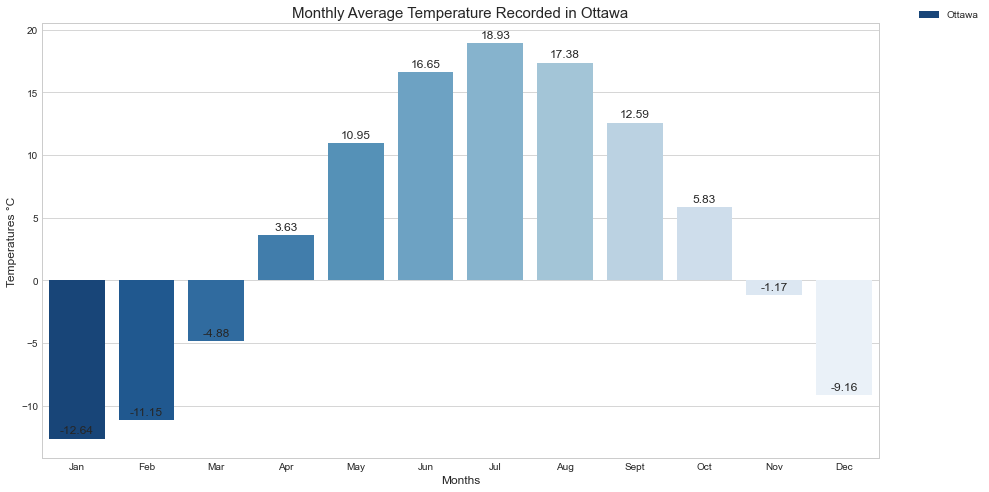

In [363]:
# mutiple
plottimeseries(monthex,cityname='Ottawa',multiple=None)

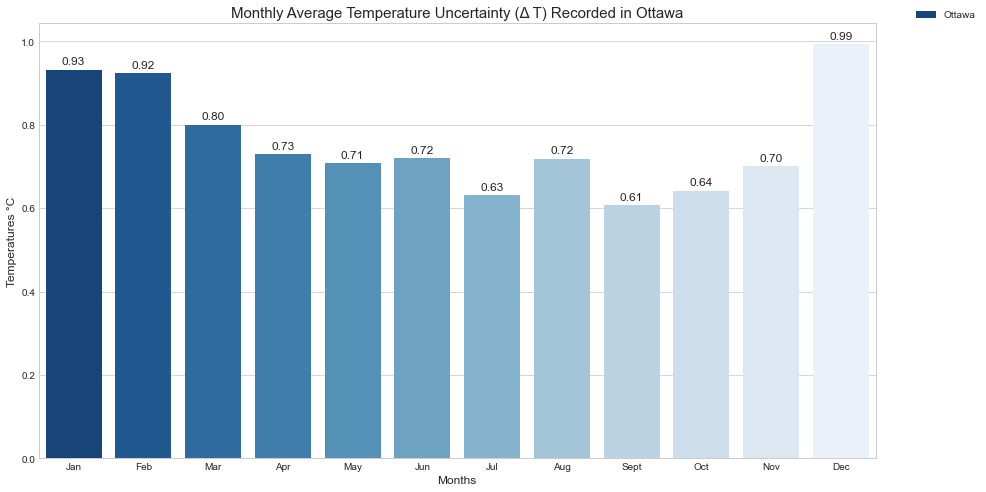

In [364]:
# mutiple
plottimeseries(monthex,cityname='Ottawa',attr='AverageTemperatureUncertainty',multiple=None)

In [305]:
# example
yearex = median_agg(dmajcity,sequence='Year',loc='City',countryname='India')

In [306]:
yearex

AverageTemperature  AverageTemperatureUncertainty
City      Year                                                   
Ahmadabad 1796           27.619000                         2.3565
          1797           27.387500                         2.1105
          1798           26.780426                         2.0195
          1799           27.878500                         2.0875
          1800           27.126000                         2.0365
...                            ...                            ...
Surat     2009           28.469500                         0.3130
          2010           28.030000                         0.3215
          2011           27.565000                         0.2560
          2012           27.708000                         0.4400
          2013           27.306000                         0.5400

[3052 rows x 2 columns]

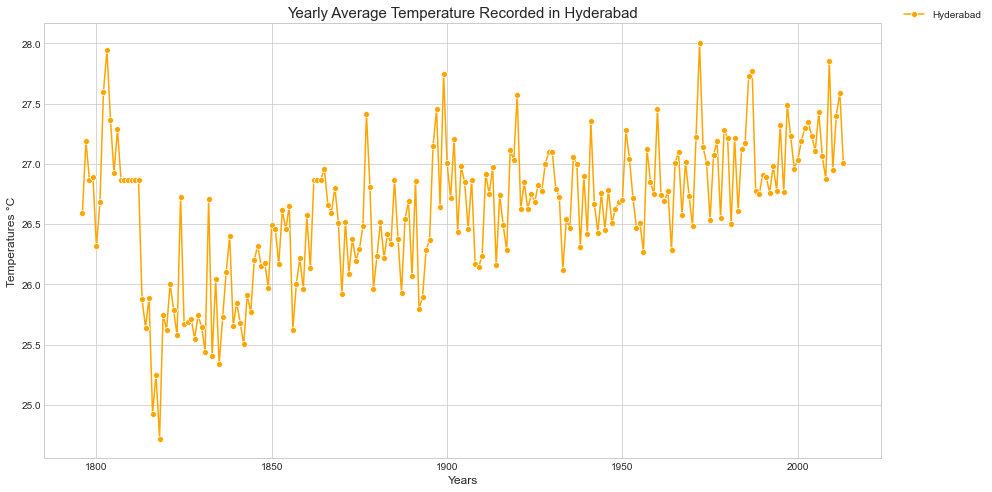

In [307]:
plottimeseries(yearex,cityname='Hyderabad')

In [57]:
indiamonthly = order_monthidx(median_agg(dcity,countryname='India'))
usmonthly = order_monthidx(median_agg(dcity,countryname='United States'))
canmonthly = order_monthidx(median_agg(dcity,countryname='Canada'))

In [63]:
indiamonthly

,AverageTemperature,AverageTemperatureUncertainty
Month,,
Jan,18.726,0.707
Feb,21.448,0.653
Mar,25.902,0.617
Apr,29.350,0.607
May,31.387,0.617
Jun,30.451,0.638
Jul,28.504,0.548
Aug,27.769,0.520
Sept,27.498,0.521


In [64]:
canmonthly

,AverageTemperature,AverageTemperatureUncertainty
Month,,
Jan,-8.765,0.866
Feb,-8.012,0.845
Mar,-2.931,0.713
Apr,4.235,0.637
May,10.713,0.616
Jun,15.904,0.591
Jul,18.552,0.583
Aug,17.513,0.588
Sept,13.025,0.526


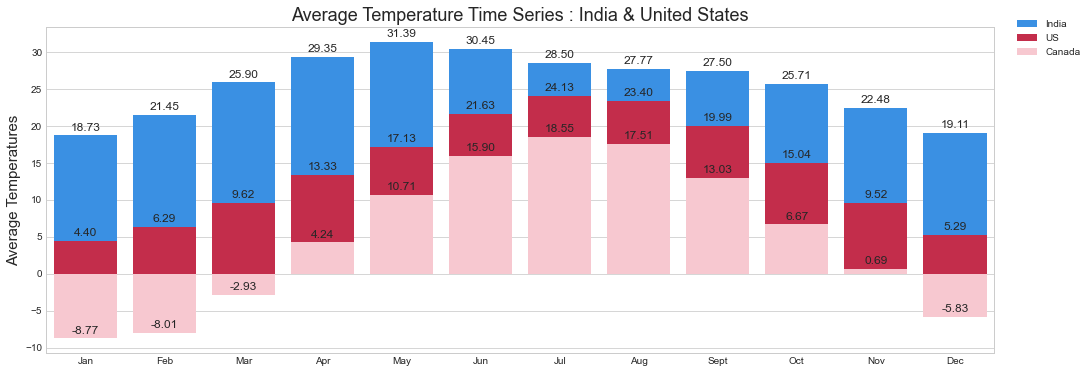

In [308]:
plt.figure(figsize=(17,6))
plots = sns.barplot(x=list(indiamonthly.index),y=indiamonthly['AverageTemperature'],label='India',color='dodgerblue')
sns.barplot(x=list(indiamonthly.index),y=usmonthly['AverageTemperature'],label='US',color='crimson')
sns.barplot(x=list(indiamonthly.index),y=canmonthly['AverageTemperature'],label='Canada',color='pink')
for bar in plots.patches:
    '''Snippet lifted from geeksforgeeks'''
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Average Temperature Time Series : India & United States',size=18)
plt.ylabel('Average Temperatures',size=15)
plt.legend(bbox_to_anchor=(1.1, 1.05))

### Interactive

In [310]:
monthex = median_agg(dcity,sequence='Month',loc='City',countryname='Canada')
pd.Series(dict(monthex.index)).index

Index(['Abbotsford', 'Barrie', 'Calgary', 'Edmonton', 'Guelph', 'Halifax',
       'Hamilton', 'Kelowna', 'Kingston', 'Kitchener', 'London', 'Montreal',
       'Oshawa', 'Ottawa', 'Quebec', 'Regina', 'Saskatoon', 'Sherbrooke',
       'Sudbury', 'Toronto', 'Trois Rivières', 'Vancouver', 'Victoria',
       'Waterloo', 'Winnipeg'],
      dtype='object')

In [316]:
torontom = order_monthidx(monthex.loc['Toronto',:])

In [317]:
torontom

,AverageTemperature,AverageTemperatureUncertainty
Month,,
Jan,-7.9840,0.8590
Feb,-7.5875,0.8260
Mar,-3.0095,0.7065
Apr,4.5010,0.7310
May,11.3315,0.6960
Jun,17.0195,0.6785
Jul,19.2300,0.6050
Aug,18.3325,0.6195
Sept,14.2305,0.5135


In [320]:
yearex = median_agg(dcity,sequence='Year',loc='City',countryname='Canada')

In [323]:
toronty = yearex.loc['Toronto',:]

In [324]:
toronty

,AverageTemperature,AverageTemperatureUncertainty
Year,,
1743,2.833956,1.591154
1744,5.832956,1.710000
1745,5.773911,1.277309
1746,5.773911,1.277309
1747,5.773911,1.277309
...,...,...
2009,6.559000,0.249000
2010,8.948000,0.226500
2011,7.316500,0.257000


In [365]:
def plotlychart(df,attr='AverageTemperature',cityname=None,sequence='Monthly'):
    
        ## Prompt 
    if attr == 'AverageTemperature':
        prompt = 'Average Temperature'
    else:
        prompt = 'Average Temperature Uncertainty (Δ T)'
    
    # Template
    pio.templates.default = 'plotly_white'
    

    if sequence == 'Monthly':

        x = list(df.index)
        y0 = np.round(df[attr].values,3)

        fig = go.Figure()
        fig.add_trace(go.Bar(x=x, y=y0, text=y0, textposition='outside',
                             marker={'color': y0, 'colorscale': 'Blues'},name='Average'))
        # fig.add_trace(go.Bar(x=x, y=y1,
        #                 marker_color='crimson',name='deltaT'))


        fig.update_layout(font=dict(size=12,family='sora'), title='Monthly {} Recorded in {}'.format(prompt,cityname), 
                          xaxis_title='Months',
                          yaxis_title='Temperature C',
                          title_x=0.5
                         )

    if sequence == 'Yearly':
        x = list(df.index)
        y0 = df[attr]

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=x, y=y0,name='Average',mode='lines',
                                line=dict(color='dodgerblue',width=2)))
        # fig.add_trace(go.Bar(x=x, y=y1,
        #                 marker_color='crimson',name='deltaT'))


        fig.update_layout(font=dict(size=12,family='sora'), title='Monthly {} Recorded in {}'.format(prompt,cityname), 
                          xaxis_title='Months',
                          yaxis_title='Temperature C',
                          title_x=0.5
                         )


    return fig


### Montly Sequence

In [367]:
plotlychart(torontom,cityname='Toronto',sequence='Monthly')

In [366]:
plotlychart(torontom,cityname='Toronto',attr='AverageTemperatureUncertainty',sequence='Monthly')

In [358]:
plotlychart(toronty,cityname='Toronto',sequence='Yearly')

In [359]:
plotlychart(toronty,cityname='Toronto',sequence='Yearly',attr='AverageTemperatureUncertainty')

### For a selected year print Average Monthly Temperature TimeSeries

In [395]:
def year_timeseries(df, year, country, city=None):
    years = df['Year'].unique()
    if year in years:
        ydf = df[dcity['Year']==year]
        cdf = ydf[ydf['Country']==country]
        cdf = cdf.groupby(['City','Month'])[['AverageTemperature','AverageTemperatureUncertainty']].median()
        if not city == None:
            try:
                return cdf.loc[city,:]
            except:
                print('Invalid City Name')
        else:
            return cdf
    else:
        print("Data doesn't have records of temperatures from the years after 2013 and before 1743")

    

In [396]:
year_timeseries(dcity, 2000, 'India')

AverageTemperature  AverageTemperatureUncertainty
City      Month                                                   
Abohar    Apr                30.352                          0.388
          Aug                32.539                          0.427
          Dec                15.533                          0.478
          Feb                14.853                          0.269
          Jan                13.192                          0.744
...                             ...                            ...
Yelahanka Mar                27.592                          0.247
          May                27.979                          0.225
          Nov                23.759                          0.317
          Oct                24.320                          0.281
          Sept               24.875                          0.217

[4692 rows x 2 columns]

In [397]:
# Template 
# Add data
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
high_2000 = [32.5, 37.6, 49.9, 53.0, 69.1, 75.4, 76.5, 76.6, 70.7, 60.6, 45.1, 29.3]
low_2000 = [13.8, 22.3, 32.5, 37.2, 49.9, 56.1, 57.7, 58.3, 51.2, 42.8, 31.6, 15.9]
high_2007 = [36.5, 26.6, 43.6, 52.3, 71.5, 81.4, 80.5, 82.2, 76.0, 67.3, 46.1, 35.0]
low_2007 = [23.6, 14.0, 27.0, 36.8, 47.6, 57.7, 58.9, 61.2, 53.3, 48.5, 31.0, 23.6]
high_2014 = [28.8, 28.5, 37.0, 56.8, 69.7, 79.7, 78.5, 77.8, 74.1, 62.6, 45.3, 39.9]
low_2014 = [12.7, 14.3, 18.6, 35.5, 49.9, 58.0, 60.0, 58.6, 51.7, 45.2, 32.2, 29.1]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=month, y=high_2014, name='High 2014',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=month, y=low_2014, name = 'Low 2014',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=month, y=high_2007, name='High 2007',
                         line=dict(color='firebrick', width=4,
                              dash='dash') # dash options include 'dash', 'dot', and 'dashdot'
))
fig.add_trace(go.Scatter(x=month, y=low_2007, name='Low 2007',
                         line = dict(color='royalblue', width=4, dash='dash')))
fig.add_trace(go.Scatter(x=month, y=high_2000, name='High 2000',
                         line = dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=month, y=low_2000, name='Low 2000',
                         line=dict(color='royalblue', width=4, dash='dot')))

# Edit the layout
fig.update_layout(title='Average High and Low Temperatures in New York',
                   xaxis_title='Month',
                   yaxis_title='Temperature (degrees F)')


fig.show()